In [1]:
import pandas as pd
import os
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score,average_precision_score
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE,ADASYN,SVMSMOTE
from statistics import mean 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from imblearn.combine import SMOTETomek,SMOTEENN
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 300
from pytorch_tabnet.augmentations import ClassificationSMOTE
aug = ClassificationSMOTE(p=0.2)
import time

In [2]:
loc_fs_df = r"C:\Users\shubh\Desktop\XGB DNN\1407\Dataset\new"

In [ ]:
skf = StratifiedKFold(n_splits=10)
sampler = SMOTETomek(n_jobs=-1,random_state=0)
scaler = MinMaxScaler()
fname =[]
l=[]
m=[]
n=[]
dy= pd.DataFrame()
t=[]
for file in os.listdir(loc_fs_df):
     #if file.endswith('_16.csv'):
    dr = pd.DataFrame()

    fname.append(file.split('.csv')[0])
    df_orig = pd.read_csv(os.path.join(loc_fs_df,file))
    df_orig = df_orig.iloc[:,1:]
    X_orig = df_orig.iloc[:,:-1].values
    y_orig = df_orig.iloc[:,-1].values
    a=[]
    b=[]
    c=[]
    k = 0
    t1 = time.time()
    for train_index, test_index in skf.split(X_orig, y_orig):

        xtrain, xtest = X_orig[train_index], X_orig[test_index]
        ytrain, ytest = y_orig[train_index], y_orig[test_index] 
        x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.20, random_state=0,stratify=ytrain)
        


        
        clf1_nopreproc = TabNetClassifier(
                       optimizer_fn=torch.optim.Adam,# Any optimizer works here
                       optimizer_params=dict(lr=2e-2),
                       scheduler_fn=torch.optim.lr_scheduler.OneCycleLR,
                       scheduler_params={"is_batch_level":True,
                                         "max_lr":5e-1,
                                         "steps_per_epoch":100,
                                         "epochs":1000
                                          },
                       mask_type='entmax', # "sparsemax",
                      )


        clf1_nopreproc.fit(
            x_train,y_train,
            eval_set=[(x_train, y_train), (x_val, y_val)],
            eval_name=['train', 'valid'],
            eval_metric=['accuracy'],
            max_epochs=1000 , patience=200,
            batch_size=1024,virtual_batch_size=128,
            weights=1,
            drop_last=False,
            
            
        )         
        
        plt.plot(clf1_nopreproc.history['loss'])
        plt.xlabel('No. of Epochs', fontsize=18)
        plt.ylabel('Loss', fontsize=18)
       
        fig1 = "C:/Users/shubh/Desktop/XGB DNN/1407/"+ file.split('.csv')[0] + "_"+"loss_"+ str(k) +".jpg"
        plt.savefig(fig1)
        

        y_pred = clf1_nopreproc.predict(xtest)
        acc = accuracy_score(y_pred,ytest)
        roc = roc_auc_score(ytest,clf1_nopreproc.predict_proba(xtest)[:,1])
        ap = average_precision_score(ytest,clf1_nopreproc.predict_proba(xtest)[:,1])
        
        a.append(acc)
        b.append(roc)
        c.append(ap)
        k=k+1
    t2 = time.time()
    td = t2-t1
    plt.clf()
    l.append(mean(a))
    m.append(mean(b))
    n.append(mean(c))
    t.append(td)
dy = pd.concat([dy,pd.Series(l),pd.Series(m),pd.Series(n),pd.Series(t)],axis=1)
dy.columns = ['Accuracy','ROC','AUPRC',
            'Time']
dy.index = fname
dy.to_csv("C:/Users/shubh/Desktop/XGB DNN/1407/kc1.csv")
            
            
            

Device used : cuda
epoch 0  | loss: 0.99475 | train_accuracy: 0.43948 | valid_accuracy: 0.44131 |  0:00:08s
epoch 1  | loss: 0.77411 | train_accuracy: 0.40658 | valid_accuracy: 0.40376 |  0:00:08s
epoch 2  | loss: 0.72023 | train_accuracy: 0.40893 | valid_accuracy: 0.46479 |  0:00:09s
epoch 3  | loss: 0.74009 | train_accuracy: 0.38778 | valid_accuracy: 0.41784 |  0:00:09s
epoch 4  | loss: 0.70207 | train_accuracy: 0.37015 | valid_accuracy: 0.37089 |  0:00:09s
epoch 5  | loss: 0.65017 | train_accuracy: 0.37015 | valid_accuracy: 0.3662  |  0:00:09s
epoch 6  | loss: 0.69083 | train_accuracy: 0.37955 | valid_accuracy: 0.3662  |  0:00:09s
epoch 7  | loss: 0.68063 | train_accuracy: 0.39835 | valid_accuracy: 0.40376 |  0:00:10s
epoch 8  | loss: 0.66688 | train_accuracy: 0.40306 | valid_accuracy: 0.43192 |  0:00:10s
epoch 9  | loss: 0.67973 | train_accuracy: 0.43361 | valid_accuracy: 0.44131 |  0:00:10s
epoch 10 | loss: 0.66938 | train_accuracy: 0.44536 | valid_accuracy: 0.43192 |  0:00:10s
ep

epoch 92 | loss: 0.59555 | train_accuracy: 0.51469 | valid_accuracy: 0.44131 |  0:00:27s
epoch 93 | loss: 0.60513 | train_accuracy: 0.51586 | valid_accuracy: 0.44601 |  0:00:28s
epoch 94 | loss: 0.61781 | train_accuracy: 0.52761 | valid_accuracy: 0.46009 |  0:00:28s
epoch 95 | loss: 0.60726 | train_accuracy: 0.52291 | valid_accuracy: 0.46009 |  0:00:28s
epoch 96 | loss: 0.59416 | train_accuracy: 0.51939 | valid_accuracy: 0.43662 |  0:00:28s
epoch 97 | loss: 0.58866 | train_accuracy: 0.52056 | valid_accuracy: 0.44131 |  0:00:28s
epoch 98 | loss: 0.59682 | train_accuracy: 0.51469 | valid_accuracy: 0.44131 |  0:00:29s
epoch 99 | loss: 0.61751 | train_accuracy: 0.52056 | valid_accuracy: 0.44601 |  0:00:29s
epoch 100| loss: 0.58337 | train_accuracy: 0.52291 | valid_accuracy: 0.4507  |  0:00:29s
epoch 101| loss: 0.6185  | train_accuracy: 0.51821 | valid_accuracy: 0.44601 |  0:00:29s
epoch 102| loss: 0.61141 | train_accuracy: 0.52056 | valid_accuracy: 0.44601 |  0:00:30s
epoch 103| loss: 0.61

epoch 185| loss: 0.57441 | train_accuracy: 0.74031 | valid_accuracy: 0.67606 |  0:00:47s
epoch 186| loss: 0.58171 | train_accuracy: 0.73325 | valid_accuracy: 0.67136 |  0:00:47s
epoch 187| loss: 0.57037 | train_accuracy: 0.7215  | valid_accuracy: 0.65728 |  0:00:47s
epoch 188| loss: 0.56262 | train_accuracy: 0.70623 | valid_accuracy: 0.65728 |  0:00:48s
epoch 189| loss: 0.5724  | train_accuracy: 0.698   | valid_accuracy: 0.64319 |  0:00:48s
epoch 190| loss: 0.59194 | train_accuracy: 0.69095 | valid_accuracy: 0.6338  |  0:00:48s
epoch 191| loss: 0.57454 | train_accuracy: 0.66627 | valid_accuracy: 0.62911 |  0:00:48s
epoch 192| loss: 0.55718 | train_accuracy: 0.64395 | valid_accuracy: 0.62441 |  0:00:48s
epoch 193| loss: 0.55162 | train_accuracy: 0.62515 | valid_accuracy: 0.59624 |  0:00:49s
epoch 194| loss: 0.55301 | train_accuracy: 0.60987 | valid_accuracy: 0.57277 |  0:00:49s
epoch 195| loss: 0.60743 | train_accuracy: 0.60282 | valid_accuracy: 0.55399 |  0:00:49s
epoch 196| loss: 0.57

epoch 278| loss: 0.54019 | train_accuracy: 0.71328 | valid_accuracy: 0.64789 |  0:01:06s
epoch 279| loss: 0.54395 | train_accuracy: 0.73208 | valid_accuracy: 0.69484 |  0:01:06s
epoch 280| loss: 0.54665 | train_accuracy: 0.75323 | valid_accuracy: 0.73239 |  0:01:06s
epoch 281| loss: 0.50866 | train_accuracy: 0.77321 | valid_accuracy: 0.74648 |  0:01:07s
epoch 282| loss: 0.52247 | train_accuracy: 0.78613 | valid_accuracy: 0.76056 |  0:01:07s
epoch 283| loss: 0.5537  | train_accuracy: 0.79201 | valid_accuracy: 0.76056 |  0:01:07s
epoch 284| loss: 0.56725 | train_accuracy: 0.79318 | valid_accuracy: 0.75587 |  0:01:07s
epoch 285| loss: 0.53921 | train_accuracy: 0.79318 | valid_accuracy: 0.75587 |  0:01:07s
epoch 286| loss: 0.56303 | train_accuracy: 0.78731 | valid_accuracy: 0.74648 |  0:01:08s
epoch 287| loss: 0.52192 | train_accuracy: 0.77908 | valid_accuracy: 0.75117 |  0:01:08s
epoch 288| loss: 0.51684 | train_accuracy: 0.76616 | valid_accuracy: 0.73239 |  0:01:08s
epoch 289| loss: 0.53

epoch 371| loss: 0.56089 | train_accuracy: 0.75323 | valid_accuracy: 0.77934 |  0:01:25s
epoch 372| loss: 0.52345 | train_accuracy: 0.75676 | valid_accuracy: 0.76056 |  0:01:25s
epoch 373| loss: 0.52503 | train_accuracy: 0.75558 | valid_accuracy: 0.77934 |  0:01:25s
epoch 374| loss: 0.53964 | train_accuracy: 0.76263 | valid_accuracy: 0.76526 |  0:01:26s
epoch 375| loss: 0.53658 | train_accuracy: 0.78378 | valid_accuracy: 0.78404 |  0:01:26s
epoch 376| loss: 0.51342 | train_accuracy: 0.78261 | valid_accuracy: 0.78404 |  0:01:26s
epoch 377| loss: 0.51679 | train_accuracy: 0.79201 | valid_accuracy: 0.77465 |  0:01:26s
epoch 378| loss: 0.4953  | train_accuracy: 0.79906 | valid_accuracy: 0.76056 |  0:01:26s
epoch 379| loss: 0.52737 | train_accuracy: 0.80611 | valid_accuracy: 0.73709 |  0:01:26s
epoch 380| loss: 0.53952 | train_accuracy: 0.82021 | valid_accuracy: 0.74648 |  0:01:27s
epoch 381| loss: 0.49559 | train_accuracy: 0.81551 | valid_accuracy: 0.74178 |  0:01:27s
epoch 382| loss: 0.50

epoch 464| loss: 0.44377 | train_accuracy: 0.79201 | valid_accuracy: 0.69014 |  0:01:44s
epoch 465| loss: 0.47494 | train_accuracy: 0.78731 | valid_accuracy: 0.69484 |  0:01:44s
epoch 466| loss: 0.46696 | train_accuracy: 0.77673 | valid_accuracy: 0.65258 |  0:01:44s
epoch 467| loss: 0.4898  | train_accuracy: 0.78143 | valid_accuracy: 0.67606 |  0:01:44s
epoch 468| loss: 0.50885 | train_accuracy: 0.79083 | valid_accuracy: 0.70423 |  0:01:44s
epoch 469| loss: 0.46154 | train_accuracy: 0.79671 | valid_accuracy: 0.71362 |  0:01:44s
epoch 470| loss: 0.51061 | train_accuracy: 0.81316 | valid_accuracy: 0.69953 |  0:01:45s
epoch 471| loss: 0.47123 | train_accuracy: 0.81434 | valid_accuracy: 0.69484 |  0:01:45s
epoch 472| loss: 0.4894  | train_accuracy: 0.82021 | valid_accuracy: 0.69953 |  0:01:45s
epoch 473| loss: 0.47585 | train_accuracy: 0.82844 | valid_accuracy: 0.70423 |  0:01:45s
epoch 474| loss: 0.5071  | train_accuracy: 0.82844 | valid_accuracy: 0.71362 |  0:01:45s
epoch 475| loss: 0.50

epoch 558| loss: 0.50902 | train_accuracy: 0.84959 | valid_accuracy: 0.65728 |  0:02:02s
epoch 559| loss: 0.4405  | train_accuracy: 0.86016 | valid_accuracy: 0.70892 |  0:02:02s
epoch 560| loss: 0.44429 | train_accuracy: 0.85899 | valid_accuracy: 0.69014 |  0:02:02s
epoch 561| loss: 0.47794 | train_accuracy: 0.85311 | valid_accuracy: 0.71831 |  0:02:02s
epoch 562| loss: 0.44414 | train_accuracy: 0.84019 | valid_accuracy: 0.723   |  0:02:02s
epoch 563| loss: 0.46544 | train_accuracy: 0.84136 | valid_accuracy: 0.723   |  0:02:03s
epoch 564| loss: 0.46655 | train_accuracy: 0.84254 | valid_accuracy: 0.73239 |  0:02:03s
epoch 565| loss: 0.44145 | train_accuracy: 0.83196 | valid_accuracy: 0.71831 |  0:02:03s
epoch 566| loss: 0.4442  | train_accuracy: 0.83666 | valid_accuracy: 0.69484 |  0:02:03s
epoch 567| loss: 0.43374 | train_accuracy: 0.83549 | valid_accuracy: 0.69014 |  0:02:03s
epoch 568| loss: 0.44133 | train_accuracy: 0.81904 | valid_accuracy: 0.67606 |  0:02:04s
epoch 569| loss: 0.42

epoch 73 | loss: 0.60549 | train_accuracy: 0.56639 | valid_accuracy: 0.50704 |  0:00:14s
epoch 74 | loss: 0.59167 | train_accuracy: 0.56874 | valid_accuracy: 0.50704 |  0:00:14s
epoch 75 | loss: 0.61714 | train_accuracy: 0.57227 | valid_accuracy: 0.50704 |  0:00:14s
epoch 76 | loss: 0.64716 | train_accuracy: 0.56404 | valid_accuracy: 0.50704 |  0:00:15s
epoch 77 | loss: 0.57579 | train_accuracy: 0.55582 | valid_accuracy: 0.50235 |  0:00:15s
epoch 78 | loss: 0.5893  | train_accuracy: 0.55699 | valid_accuracy: 0.48826 |  0:00:15s
epoch 79 | loss: 0.60676 | train_accuracy: 0.54994 | valid_accuracy: 0.48826 |  0:00:15s
epoch 80 | loss: 0.60805 | train_accuracy: 0.54994 | valid_accuracy: 0.48826 |  0:00:16s
epoch 81 | loss: 0.63298 | train_accuracy: 0.54994 | valid_accuracy: 0.48826 |  0:00:16s
epoch 82 | loss: 0.62393 | train_accuracy: 0.55464 | valid_accuracy: 0.48826 |  0:00:16s
epoch 83 | loss: 0.60301 | train_accuracy: 0.55112 | valid_accuracy: 0.48826 |  0:00:16s
epoch 84 | loss: 0.59

epoch 167| loss: 0.56743 | train_accuracy: 0.58754 | valid_accuracy: 0.46948 |  0:00:33s
epoch 168| loss: 0.5594  | train_accuracy: 0.56287 | valid_accuracy: 0.44601 |  0:00:33s
epoch 169| loss: 0.5779  | train_accuracy: 0.53937 | valid_accuracy: 0.40845 |  0:00:33s
epoch 170| loss: 0.56008 | train_accuracy: 0.52526 | valid_accuracy: 0.39906 |  0:00:34s
epoch 171| loss: 0.56283 | train_accuracy: 0.52644 | valid_accuracy: 0.39437 |  0:00:34s
epoch 172| loss: 0.5757  | train_accuracy: 0.52879 | valid_accuracy: 0.40845 |  0:00:34s
epoch 173| loss: 0.58743 | train_accuracy: 0.54407 | valid_accuracy: 0.41315 |  0:00:34s
epoch 174| loss: 0.54548 | train_accuracy: 0.58049 | valid_accuracy: 0.48826 |  0:00:34s
epoch 175| loss: 0.56809 | train_accuracy: 0.59929 | valid_accuracy: 0.48826 |  0:00:35s
epoch 176| loss: 0.53405 | train_accuracy: 0.60635 | valid_accuracy: 0.51643 |  0:00:35s
epoch 177| loss: 0.56771 | train_accuracy: 0.62045 | valid_accuracy: 0.52113 |  0:00:35s
epoch 178| loss: 0.54

epoch 260| loss: 0.53424 | train_accuracy: 0.67803 | valid_accuracy: 0.60563 |  0:00:52s
epoch 261| loss: 0.52754 | train_accuracy: 0.6369  | valid_accuracy: 0.57277 |  0:00:53s
epoch 262| loss: 0.58674 | train_accuracy: 0.63102 | valid_accuracy: 0.57746 |  0:00:53s
epoch 263| loss: 0.57195 | train_accuracy: 0.63102 | valid_accuracy: 0.58216 |  0:00:53s
epoch 264| loss: 0.55321 | train_accuracy: 0.64042 | valid_accuracy: 0.59155 |  0:00:53s
epoch 265| loss: 0.52857 | train_accuracy: 0.67215 | valid_accuracy: 0.61033 |  0:00:54s
epoch 266| loss: 0.53611 | train_accuracy: 0.71328 | valid_accuracy: 0.6338  |  0:00:54s
epoch 267| loss: 0.53253 | train_accuracy: 0.72973 | valid_accuracy: 0.64319 |  0:00:54s
epoch 268| loss: 0.51704 | train_accuracy: 0.74383 | valid_accuracy: 0.65728 |  0:00:54s
epoch 269| loss: 0.55349 | train_accuracy: 0.74618 | valid_accuracy: 0.66667 |  0:00:54s
epoch 270| loss: 0.54388 | train_accuracy: 0.74266 | valid_accuracy: 0.67136 |  0:00:55s
epoch 271| loss: 0.55

epoch 353| loss: 0.54257 | train_accuracy: 0.77556 | valid_accuracy: 0.65728 |  0:01:12s
epoch 354| loss: 0.51154 | train_accuracy: 0.77321 | valid_accuracy: 0.6385  |  0:01:12s
epoch 355| loss: 0.52152 | train_accuracy: 0.75558 | valid_accuracy: 0.6385  |  0:01:13s
epoch 356| loss: 0.52308 | train_accuracy: 0.74618 | valid_accuracy: 0.62441 |  0:01:13s
epoch 357| loss: 0.52791 | train_accuracy: 0.74148 | valid_accuracy: 0.62441 |  0:01:13s
epoch 358| loss: 0.51011 | train_accuracy: 0.74031 | valid_accuracy: 0.61033 |  0:01:13s
epoch 359| loss: 0.52149 | train_accuracy: 0.74853 | valid_accuracy: 0.61033 |  0:01:14s
epoch 360| loss: 0.4988  | train_accuracy: 0.75441 | valid_accuracy: 0.6338  |  0:01:14s
epoch 361| loss: 0.48766 | train_accuracy: 0.76146 | valid_accuracy: 0.62911 |  0:01:14s
epoch 362| loss: 0.5137  | train_accuracy: 0.76616 | valid_accuracy: 0.62911 |  0:01:14s
epoch 363| loss: 0.50179 | train_accuracy: 0.75911 | valid_accuracy: 0.62911 |  0:01:14s
epoch 364| loss: 0.54

epoch 446| loss: 0.50378 | train_accuracy: 0.74266 | valid_accuracy: 0.61972 |  0:01:32s
epoch 447| loss: 0.50375 | train_accuracy: 0.75911 | valid_accuracy: 0.61972 |  0:01:32s
epoch 448| loss: 0.49219 | train_accuracy: 0.77556 | valid_accuracy: 0.64319 |  0:01:32s
epoch 449| loss: 0.49465 | train_accuracy: 0.77086 | valid_accuracy: 0.6338  |  0:01:32s
epoch 450| loss: 0.48553 | train_accuracy: 0.78496 | valid_accuracy: 0.6338  |  0:01:33s
epoch 451| loss: 0.4883  | train_accuracy: 0.78143 | valid_accuracy: 0.65258 |  0:01:33s
epoch 452| loss: 0.49542 | train_accuracy: 0.78496 | valid_accuracy: 0.65258 |  0:01:33s
epoch 453| loss: 0.50075 | train_accuracy: 0.78613 | valid_accuracy: 0.66197 |  0:01:33s
epoch 454| loss: 0.4743  | train_accuracy: 0.77791 | valid_accuracy: 0.6338  |  0:01:34s
epoch 455| loss: 0.51337 | train_accuracy: 0.77321 | valid_accuracy: 0.6338  |  0:01:34s
epoch 456| loss: 0.5042  | train_accuracy: 0.76263 | valid_accuracy: 0.61972 |  0:01:34s
epoch 457| loss: 0.45

epoch 540| loss: 0.44461 | train_accuracy: 0.77321 | valid_accuracy: 0.6385  |  0:01:51s
epoch 541| loss: 0.43928 | train_accuracy: 0.77438 | valid_accuracy: 0.6385  |  0:01:51s
epoch 542| loss: 0.43652 | train_accuracy: 0.77203 | valid_accuracy: 0.61972 |  0:01:52s
epoch 543| loss: 0.4533  | train_accuracy: 0.78026 | valid_accuracy: 0.6338  |  0:01:52s
epoch 544| loss: 0.49049 | train_accuracy: 0.78261 | valid_accuracy: 0.64789 |  0:01:52s
epoch 545| loss: 0.46425 | train_accuracy: 0.78496 | valid_accuracy: 0.64789 |  0:01:52s
epoch 546| loss: 0.42979 | train_accuracy: 0.79906 | valid_accuracy: 0.62911 |  0:01:52s
epoch 547| loss: 0.46462 | train_accuracy: 0.79318 | valid_accuracy: 0.61972 |  0:01:52s
epoch 548| loss: 0.48019 | train_accuracy: 0.78731 | valid_accuracy: 0.61972 |  0:01:53s
epoch 549| loss: 0.45688 | train_accuracy: 0.78261 | valid_accuracy: 0.61972 |  0:01:53s
epoch 550| loss: 0.46446 | train_accuracy: 0.77908 | valid_accuracy: 0.59155 |  0:01:53s
epoch 551| loss: 0.44

BEST ACCURACY SCORE ON VALIDATION SET : 0.7884615384615384
BEST ACCURACY SCORE ON TEST SET : 0.75


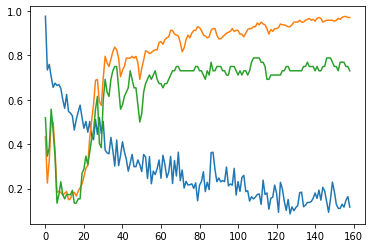

In [12]:
from matplotlib import pyplot as plt
# plot losses
plt.plot(clf1_nopreproc.history['loss'])

# plot accuracy
plt.plot(clf1_nopreproc.history['train_accuracy'])
plt.plot(clf1_nopreproc.history['valid_accuracy'])

# find and plot feature importance
y_pred = clf1_nopreproc.predict(x_test)
clf1_nopreproc.feature_importances_
# feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=feat.columns)
# feat_importances.nlargest(20).plot(kind='barh')


# determine best accuracy for test set
preds = clf1_nopreproc.predict(x_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1_nopreproc.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")




In [5]:
dy.to_csv("C:/Users/shubh/Desktop/XGB DNN/Results/1.csv")